<a href="https://colab.research.google.com/github/quinnalfaro/HomeWork5/blob/main/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch

In [ ]:
path = '/content/sample_data/'

df_train = pd.read_csv('/content/sample_data/mnist_train_small.csv')
df_val = pd.read_csv('/content/sample_data/mnist_test.csv')

In [ ]:
class DigitsDataset(torch.utils.data.Dataset):
    def __init__(self, df):
        self.df = df
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        
        x = np.float32(row[1:].values)/255
        y = row[0]
        
        return x, y

In [ ]:
dataset_train = DigitsDataset(df_train)
dataset_val = DigitsDataset(df_val)

dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size = 64, shuffle = True)
dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size = 64, shuffle = True)

tensor(4)


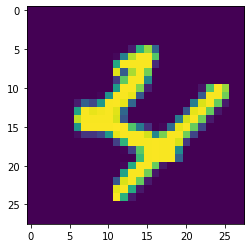

In [ ]:
X_batch, Y_batch = next(iter(dataloader_train))
plt.imshow(np.reshape(X_batch[0], (28,28)))
print(Y_batch[0])

In [ ]:
class SimpleNeuralNetwork(torch.nn.Module):
    def __init__(self):
        
        super().__init__()
        self.dense1 = torch.nn.Linear(784, 100)
        self.dense2 = torch.nn.Linear(100, 10)
        
        self.ReLU = torch.nn.ReLU()
        
    def forward(self, x):
        x = self.dense1(x)
        x = self.ReLU(x)
        x = self.dense2(x)
        
        return x

In [ ]:
model = SimpleNeuralNetwork()
device = torch.device('cuda')
model = model.to(device)

In [ ]:
loss_fun = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
num_epochs = 10
N_train = len(dataset_train)
N_val = len(dataset_val)

train_losses = []
val_losses = []

for ep in range(num_epochs):

    model.train()
    train_loss = 0.0
    batch_idx = 0
    
    for X_batch, Y_batch in dataloader_train:
        
        X_batch = X_batch.to(device)
        Y_batch = Y_batch.to(device)
        
        N_batch = X_batch.shape[0]
        outputs = model(X_batch)
        loss_oneBatch = loss_fun(outputs, Y_batch)
        
        model.zero_grad()
        loss_oneBatch.backward()
        optimizer.step()
        
        train_loss += loss_oneBatch*N_batch
        
    model.eval()
    val_loss = 0.0
    for X_batch, Y_batch in dataloader_val:
        X_batch = X_batch.to(device)
        Y_batch = Y_batch.to(device)
        
        with torch.no_grad():
            
            N_batch = X_batch.shape[0]
            outputs = model(X_batch)
            loss_oneBatch = loss_fun(outputs, Y_batch)
            val_loss += loss_oneBatch*N_batch
            
    train_losses.append(train_loss/N_train)
    val_losses.append(val_loss/N_val)
    
    print('epoch: ', ep, 'train loss: ', train_loss/N_train, 'validation loss: ', val_loss/N_val)

epoch:  0 train loss:  tensor(0.5763, device='cuda:0', grad_fn=<DivBackward0>) validation loss:  tensor(0.3016, device='cuda:0')
epoch:  1 train loss:  tensor(0.2732, device='cuda:0', grad_fn=<DivBackward0>) validation loss:  tensor(0.2421, device='cuda:0')
epoch:  2 train loss:  tensor(0.2181, device='cuda:0', grad_fn=<DivBackward0>) validation loss:  tensor(0.2079, device='cuda:0')
epoch:  3 train loss:  tensor(0.1799, device='cuda:0', grad_fn=<DivBackward0>) validation loss:  tensor(0.1879, device='cuda:0')
epoch:  4 train loss:  tensor(0.1506, device='cuda:0', grad_fn=<DivBackward0>) validation loss:  tensor(0.1710, device='cuda:0')
epoch:  5 train loss:  tensor(0.1261, device='cuda:0', grad_fn=<DivBackward0>) validation loss:  tensor(0.1612, device='cuda:0')
epoch:  6 train loss:  tensor(0.1059, device='cuda:0', grad_fn=<DivBackward0>) validation loss:  tensor(0.1480, device='cuda:0')
epoch:  7 train loss:  tensor(0.0920, device='cuda:0', grad_fn=<DivBackward0>) validation loss:  

The following is a plot of objective function value versus epoch. We do not observe overfitting, and can see this is the fact that though the fact that the validation and training dataset see a drop in objective function over iterations. If it were overfitting, then we would likely observe the validation's objective function value (orange) rise as the training function's objective function value (blue) would continue to drop. Around 3 though we begin to see some overfitting as the validation loss value flattens as the training loss continues to drop somewhat sharply.

Text(0.5, 1.0, 'Objective function value versus epoch')

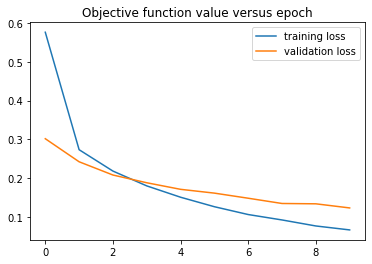

In [ ]:
plt.plot(train_losses, label = 'training loss')
plt.plot(val_losses, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title('Objective function value versus epoch')

Here we see the astonishing accuracy of the neural network as it gives us a 96% accuracy. 

In [ ]:
num_correct = 0
model.eval()

for X_batch, Y_batch in dataloader_val:
  X_batch = X_batch.to(device)
  Y_batch = Y_batch.to(device)

  with torch.no_grad():
    outputs = model(X_batch)
    #Non-numpy (Torch) syntax
    #print(outputs.argmax(axis =1))
    num_correct += sum(outputs.argmax(axis =1) == Y_batch)
print('Accuracy: ', num_correct/N_val)

Accuracy:  tensor(0.9642, device='cuda:0')


# **Logistic regression from Neural Network**

To make this now into a multiple logistic regression, we simple change the dimenstions to remove all of the hidden layers. This makes the neural network then act simply as a multiple logistic regression. I had difficulty getting a high accuracy with this method getting the best results by lowering the learning rate and raising the number of epochs. This though still only gave an accuracy around 35%.

In [ ]:
dataset_train = DigitsDataset(df_train)
dataset_val = DigitsDataset(df_val)

dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size = 64, shuffle = True)
dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size = 64, shuffle = True)

tensor(7)


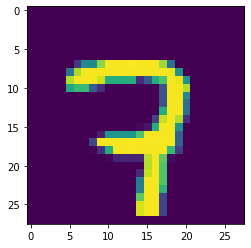

In [ ]:
X_batch, Y_batch = next(iter(dataloader_train))
plt.imshow(np.reshape(X_batch[0], (28,28)))
print(Y_batch[0])

In [ ]:
class SimpleLogisticNeuralNetwork(torch.nn.Module):
    def __init__(self):
        
        super().__init__()
        #Here we change the dimensions to remove the hidden layers
        self.dense1 = torch.nn.Linear(784, 1)
        self.dense2 = torch.nn.Linear(1, 10)
        
        self.ReLU = torch.nn.ReLU()
        #the additions of the softmax function here increases the accuracy of the model by 20%
        self.Softmax = torch.nn.Softmax(dim =1)

        
    def forward(self, x):
        x = self.dense1(x)
        x = self.ReLU(x)
        x = self.dense2(x)
        
        return x

In [ ]:
logModel = SimpleLogisticNeuralNetwork()
device = torch.device('cuda')
logModel = logModel.to(device)

In [ ]:
loss_fun = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(logModel.parameters(), lr = 0.001)

In [ ]:
num_epochs = 25
N_train = len(dataset_train)
N_val = len(dataset_val)

train_losses = []
val_losses = []

for ep in range(num_epochs):

    logModel.train()
    train_loss = 0.0
    batch_idx = 0
    
    for X_batch, Y_batch in dataloader_train:
        
        X_batch = X_batch.to(device)
        Y_batch = Y_batch.to(device)
        
        N_batch = X_batch.shape[0]
        outputs = logModel(X_batch)
        loss_oneBatch = loss_fun(outputs, Y_batch)
        
        logModel.zero_grad()
        loss_oneBatch.backward()
        optimizer.step()
        
        train_loss += loss_oneBatch*N_batch
        
    logModel.eval()
    val_loss = 0.0
    for X_batch, Y_batch in dataloader_val:
        X_batch = X_batch.to(device)
        Y_batch = Y_batch.to(device)
        
        with torch.no_grad():
            
            N_batch = X_batch.shape[0]
            outputs = logModel(X_batch)
            loss_oneBatch = loss_fun(outputs, Y_batch)
            val_loss += loss_oneBatch*N_batch
            
    train_losses.append(train_loss/N_train)
    val_losses.append(val_loss/N_val)
    print('epoch: ', ep, 'train loss: ', train_loss/N_train, 'validation loss: ', val_loss/N_val)

epoch:  0 train loss:  tensor(1.6844, device='cuda:0', grad_fn=<DivBackward0>) validation loss:  tensor(1.6881, device='cuda:0')
epoch:  1 train loss:  tensor(1.6832, device='cuda:0', grad_fn=<DivBackward0>) validation loss:  tensor(1.6915, device='cuda:0')
epoch:  2 train loss:  tensor(1.6813, device='cuda:0', grad_fn=<DivBackward0>) validation loss:  tensor(1.6850, device='cuda:0')
epoch:  3 train loss:  tensor(1.6806, device='cuda:0', grad_fn=<DivBackward0>) validation loss:  tensor(1.6836, device='cuda:0')
epoch:  4 train loss:  tensor(1.6788, device='cuda:0', grad_fn=<DivBackward0>) validation loss:  tensor(1.6824, device='cuda:0')
epoch:  5 train loss:  tensor(1.6776, device='cuda:0', grad_fn=<DivBackward0>) validation loss:  tensor(1.6815, device='cuda:0')
epoch:  6 train loss:  tensor(1.6768, device='cuda:0', grad_fn=<DivBackward0>) validation loss:  tensor(1.6824, device='cuda:0')
epoch:  7 train loss:  tensor(1.6763, device='cuda:0', grad_fn=<DivBackward0>) validation loss:  

In [ ]:
num_correct = 0
logModel.eval()

for X_batch, Y_batch in dataloader_val:
  X_batch = X_batch.to(device)
  Y_batch = Y_batch.to(device)

  with torch.no_grad():
    outputs = logModel(X_batch)
    #Non-numpy (Torch) syntax
    #print(outputs.argmax(axis =1))
    num_correct += sum(outputs.argmax(axis =1) == Y_batch)
print('Accuracy: ', num_correct/N_val)

Accuracy:  tensor(0.3503, device='cuda:0')
